In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from kneed import KneeLocator

In [7]:
df = pd.read_csv("D:\Georgian\Big Data\Sem2\Social data mining\FinalProject\data\cc_cleaned.csv")

## PART C: Implementation of Techniques

### K-means Clustring With PCA

In [8]:
pca = PCA(n_components=0.95)
X_red = pca.fit_transform(df)

In [9]:
K = range(1, 11)
inertia = [KMeans(n_clusters=k, random_state=0).fit(X_red).inertia_ for k in K]

# Using KneeLocator to find the optimal k
kneedle = KneeLocator(K, inertia, curve='convex', direction='decreasing')
optimal_k = kneedle.elbow

c:\Users\Acer\anaconda3\envs\hello\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Acer\anaconda3\envs\hello\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Acer\anaconda3\envs\hello\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Acer\anaconda3\envs\hello\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

C:\Users\Acer\AppData\Local\Temp\ipykernel_8196\3540212909.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(range(1, 11), inertia, 'bo-', markersize=8, color='royalblue')


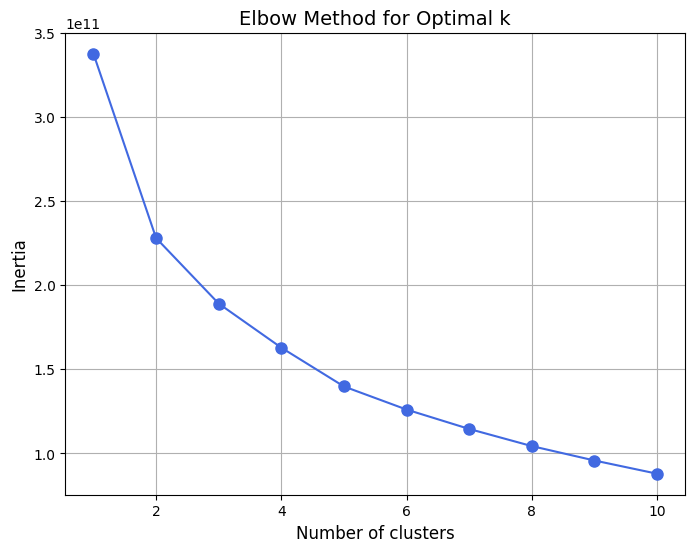

In [10]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, 'bo-', markersize=8, color='royalblue')
plt.xlabel('Number of clusters', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.title('Elbow Method for Optimal k', fontsize=14)
plt.grid(True)
plt.show()

In [11]:
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
clusters = kmeans.fit_predict(X_red)
df_finalresult = pd.DataFrame(df)
df_finalresult['kmeans_cluster'] = clusters

inertia = kmeans.inertia_

c:\Users\Acer\anaconda3\envs\hello\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


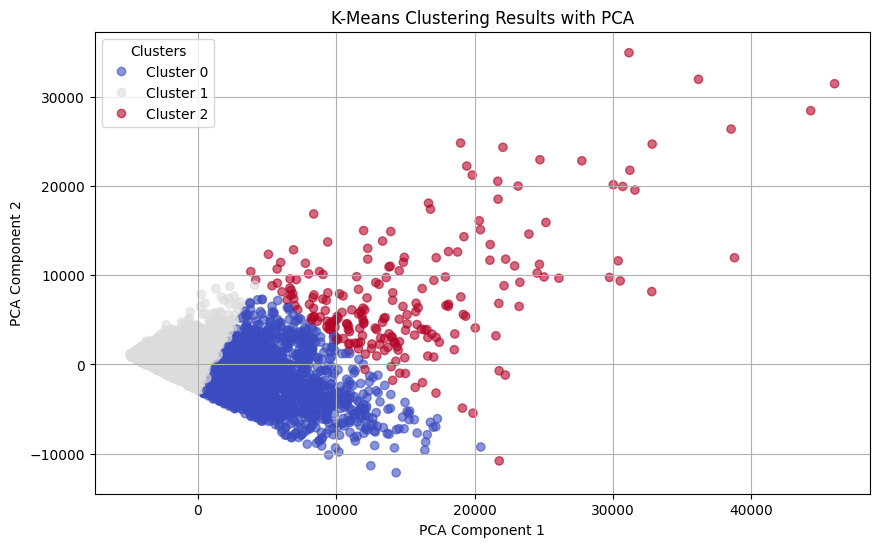

In [12]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_red[:, 0], X_red[:, 1], c=clusters, cmap='coolwarm', alpha=0.6)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering Results with PCA')
legend_labels = [f'Cluster {i}' for i in range(optimal_k)]
handles, _ = scatter.legend_elements()
plt.legend(handles, legend_labels, title="Clusters")
plt.grid()
plt.show()

In [13]:
cluster_df = pd.DataFrame(df)
cluster_df['clusters'] = clusters
cluster_df.head(10)

,BALANCE,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,clusters
0,40.900749,0.818182,0.00,95.40,0.000000,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,6442.945483,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,0.00,0.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,0.00,205.788017,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,0.00,0.000000,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1
5,1809.828751,1.000000,0.00,1333.28,0.000000,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,1
6,627.260806,1.000000,6402.63,688.38,0.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12,0
7,1823.652743,1.000000,0.00,436.20,0.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12,1
8,1014.926473,1.000000,661.49,200.00,0.000000,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12,0
9,152.225975,0.545455,1281.60,0.00,0.000000,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12,0


In [14]:
cluster_df.to_csv("D:\Georgian\Big Data\Sem2\Social data mining\FinalProject\data\CC_clustered.csv", index=False)